In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import scipy.stats as stats

D:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Print the shape

In [3]:
df = pd.read_csv('olympics.csv')
shape = df.shape
print(shape)

(271116, 17)


# Describe the Age column

In [ ]:
Describe the Age column of the dataset on various parameters using describe API.

Output Format:
count    261642.000000
mean         25.556898
std           6.393561
...

In [4]:
olympics = pd.read_csv('olympics.csv')
desc_age = olympics['Age'].describe()
print(desc_age)

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64


# Print numeric datatypes

In [ ]:
Print the list of columns that have numeric datatypes.
Numeric datatypes include ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'].

Try to solve this problem with pandas and numpy.
Output Format:
List of columns having numeric datatypes

In [5]:
olympics = pd.read_csv('olympics.csv')

# Used 'dtypes' and 'select_dtypes' to filter out the numeric columns
numeric_col = olympics.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
numeric_col_list = list(numeric_col.columns)
print(numeric_col_list)

['ID', 'Age', 'Height', 'Weight', 'Year']


# Null values

In [ ]:
Print the columns that contain null values along with the count of null values present in each column.

Output Format:
Column_name - Number of null values.

In [6]:
olympics = pd.read_csv('olympics.csv')

list_columns = list(olympics.columns)

for i in list_columns:
    if olympics[i].isnull().sum() > 0:
        print(i,'-',olympics[i].isnull().sum())

Age - 9474
Height - 60171
Weight - 62875
Medal - 231333
region - 370
notes - 266077


# Handling Missing Values

In [ ]:
In the previous column you analyzed the columns that contain any missing values.
You found out that Age, Height, Weight, Medal, region and notes columns contain null values.
Now you need to handle these missing values.
For the columns "Height, Weight and notes", you are going to drop these columns as they are not required in our further analysis
For the "region" column, remove all the rows where the region column is having null values.
For output print the shape of the dataset after performing these operations.

Note: You are going to handle the Medal and Age column in the next questions.
    
Output Format:
print the shape of the dataset after performing the missing value handling operations.

In [7]:
olympics = pd.read_csv('olympics.csv')

olympics.drop(['Height','Weight','notes'],axis=1,inplace=True)
olympics.dropna(subset=['region'],inplace=True)
print(olympics.shape)

(270746, 14)


# Replace missing values

In [ ]:
In previous question you handled the missing values for the columns ["Height", "Weight", "notes", "region"].

Still there are missing values present in the "Medal" column. Now you don't need to drop the values present in this column 
because Medals have a NaN in about 2,31,333 rows. These can be explained since not all participating athletes would win medals.
Let's replace these missing values with 'DNW'. DNW means Did not win.

For the output print the unique number of values present in the Medal column.

Output Format:
DNW       230972
Gold       13371
Bronze     13291
...

In [8]:
olympics = pd.read_csv('olympics.csv')

olympics.drop(['Height','Weight','notes'],axis=1,inplace=True)
olympics.dropna(subset=['region'],inplace=True)

olympics['Medal'].fillna('DNW',inplace=True)

print(olympics['Medal'].value_counts())

DNW       230972
Gold       13371
Bronze     13291
Silver     13112
Name: Medal, dtype: int64


# Handling Missing Values Using Mean

In [ ]:
You have an Age column that contains some null values. Rather than deleting them, fill these missing values by 
(means of the age of the players belonging to that particular game).

Example:
Let's suppose there is a missing value of Age where the sport is Swimming, then replace that missing value of age with the 
mean age of all the players who belong to Swimming. Similarly for all other sports.
After this print the mean of the Age column.

Output Format:
Mean of age column rounded by 0 decimal places.

In [9]:
olympics = pd.read_csv('olympics.csv')

olympics.drop(columns=["notes", "Height", "Weight"], inplace=True)
olympics.dropna(subset=['region'],inplace=True)
olympics['Medal'].fillna('DNW', inplace = True)

age_games_mean = olympics.groupby('Sport')['Age'].mean()

# Iterate over the rows of the dataframe
for i, row in olympics.iterrows():  
    if pd.isnull(row['Age']):
        olympics.loc[i, 'Age'] = age_games_mean[row['Sport']]

print(round(olympics['Age'].mean()))

26


# Probability Distribution of Age

In [ ]:
Calculate the probability distribution of the Age column.
Firstly plot the line chart to get the idea of the range of probability distribution and then print the maximum probability 
distribution in the range of 5.

Output Format:
Print the maximum distribution in the range of 5.

20 to 25


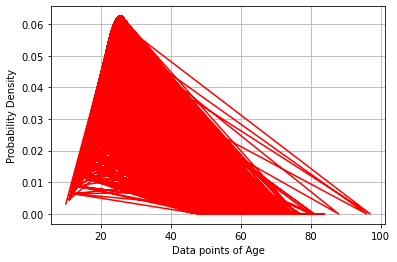

In [12]:
from scipy.stats import norm

olympics = pd.read_csv('olympics_cleaned.csv')

age_mean = np.mean(olympics['Age'])
age_stdev = np.std(olympics['Age'])
pdf = norm.pdf(olympics['Age'],age_mean,age_stdev)

print('20 to 25')
plt.plot(olympics['Age'],pdf,color='red')
plt.grid()
plt.xlabel('Data points of Age')
plt.ylabel('Probability Density')
plt.show()

# Find Skewness

In [ ]:
Is the overall distribution of Gold Medals tally of India, left or negatively skewed?

Output Format
Print Skewness

In [13]:
olympics = pd.read_csv('olympics_cleaned.csv')

india_df = olympics.loc[(olympics['region']=='India')&(olympics['Medal']=='Gold')]
gold_count = india_df.groupby("Year")["Medal"].value_counts() 

gold_count_mean = st.mean(gold_count)
gold_count_median = st.median(gold_count)
gold_count_mode = st.mode(gold_count)

print(gold_count_mean)
print(gold_count_median)
print(gold_count_mode)


if stats.skew(gold_count, bias=False) > 0:
    print("Right Skewed") 
else: 
    print("Left Skewed")

13.8
15.0
14
Left Skewed


# Standard Deviation of Gold Medals

In [ ]:
What is the standard deviation/error of the distribution of gold medals when the UK is hosting the Olympic games and 
when not hosting the games? (When games are hosted in the UK, the city is London)

Output Format
Standard Deviation when hosting
Standard Deviation when not hosting

In [69]:
olympics = pd.read_csv('olympics_cleaned.csv')

uk_hosting = olympics[(olympics['City']=='London') & (olympics['Medal']=='Gold') & (olympics["region"] == "UK")]
uk_not_hosting = olympics[(olympics['City']!='London') & (olympics['Medal']=='Gold') & (olympics["region"] == "UK")]

gold_uk_hosting = uk_hosting.groupby("Year")["Medal"].value_counts() 
gold_uk_not_hosting = uk_not_hosting.groupby("Year")["Medal"].value_counts() 

stddev_uk_hosting = st.stdev(gold_uk_hosting)
stddev_uk_not_hosting = st.stdev(gold_uk_not_hosting)

print(stddev_uk_hosting)
print(stddev_uk_not_hosting)

71.97453253292676
18.14528124684469


# Standardize the Data

In [ ]:
Standardise the age of all the participants participating in the Shooting Competition and 
calculate this standardised data's mean and standard deviation.

Output Format
standardized mean
standardized standard deviation

In [24]:
olympics = pd.read_csv('olympics_cleaned.csv')

shooting_game = olympics[olympics['Sport']=='Shooting']

original_mean = st.mean(shooting_game['Age'])
original_sd = st.stdev(shooting_game['Age'])
z_score = stats.zscore(shooting_game['Age'])
    
standard_mean = st.mean(z_score)
standard_stddev = st.stdev(z_score)

print(round(standard_mean))
print(round(standard_stddev))

0
1


# Correlation analysis

In [ ]:
Is Age positively correlated or negatively correlated with winning the medal?
Print "Positive" if the correlation is positive and "Negative" if the correlation is negative.

Output format
Print "Positive" or "Negative"

In [41]:
olympics = pd.read_csv('olympics_cleaned.csv')

olympics['Medal'].replace(['DNW', 'Gold', 'Bronze', 'Silver'],[0,1,1,1],inplace=True)

# To find out correlation between 2 columns
correlation_winning_medal = olympics['Age'].corr(olympics['Medal'])
print('Positive')

Positive


# Calculate IQR

In [ ]:
From the dataset, Calculate the IQR for the Age column.

Output Format
IQR value

In [44]:
olympics = pd.read_csv('olympics_cleaned.csv')

_25th_quartile = np.percentile(olympics['Age'],25)
_75th_quartile = np.percentile(olympics['Age'],75)

print(_75th_quartile-_25th_quartile)

6.0
